<img src="./img/hig_logo.png">

# HIG - Actividad 1 - Segmentación de imágenes
---

### Objetivo

- Realizar la segmentación de la imagen proporcionada en la carpeta de la actividad, de al menos dos de los cactus de diferentes colores (sólo la planta, no la maceta).

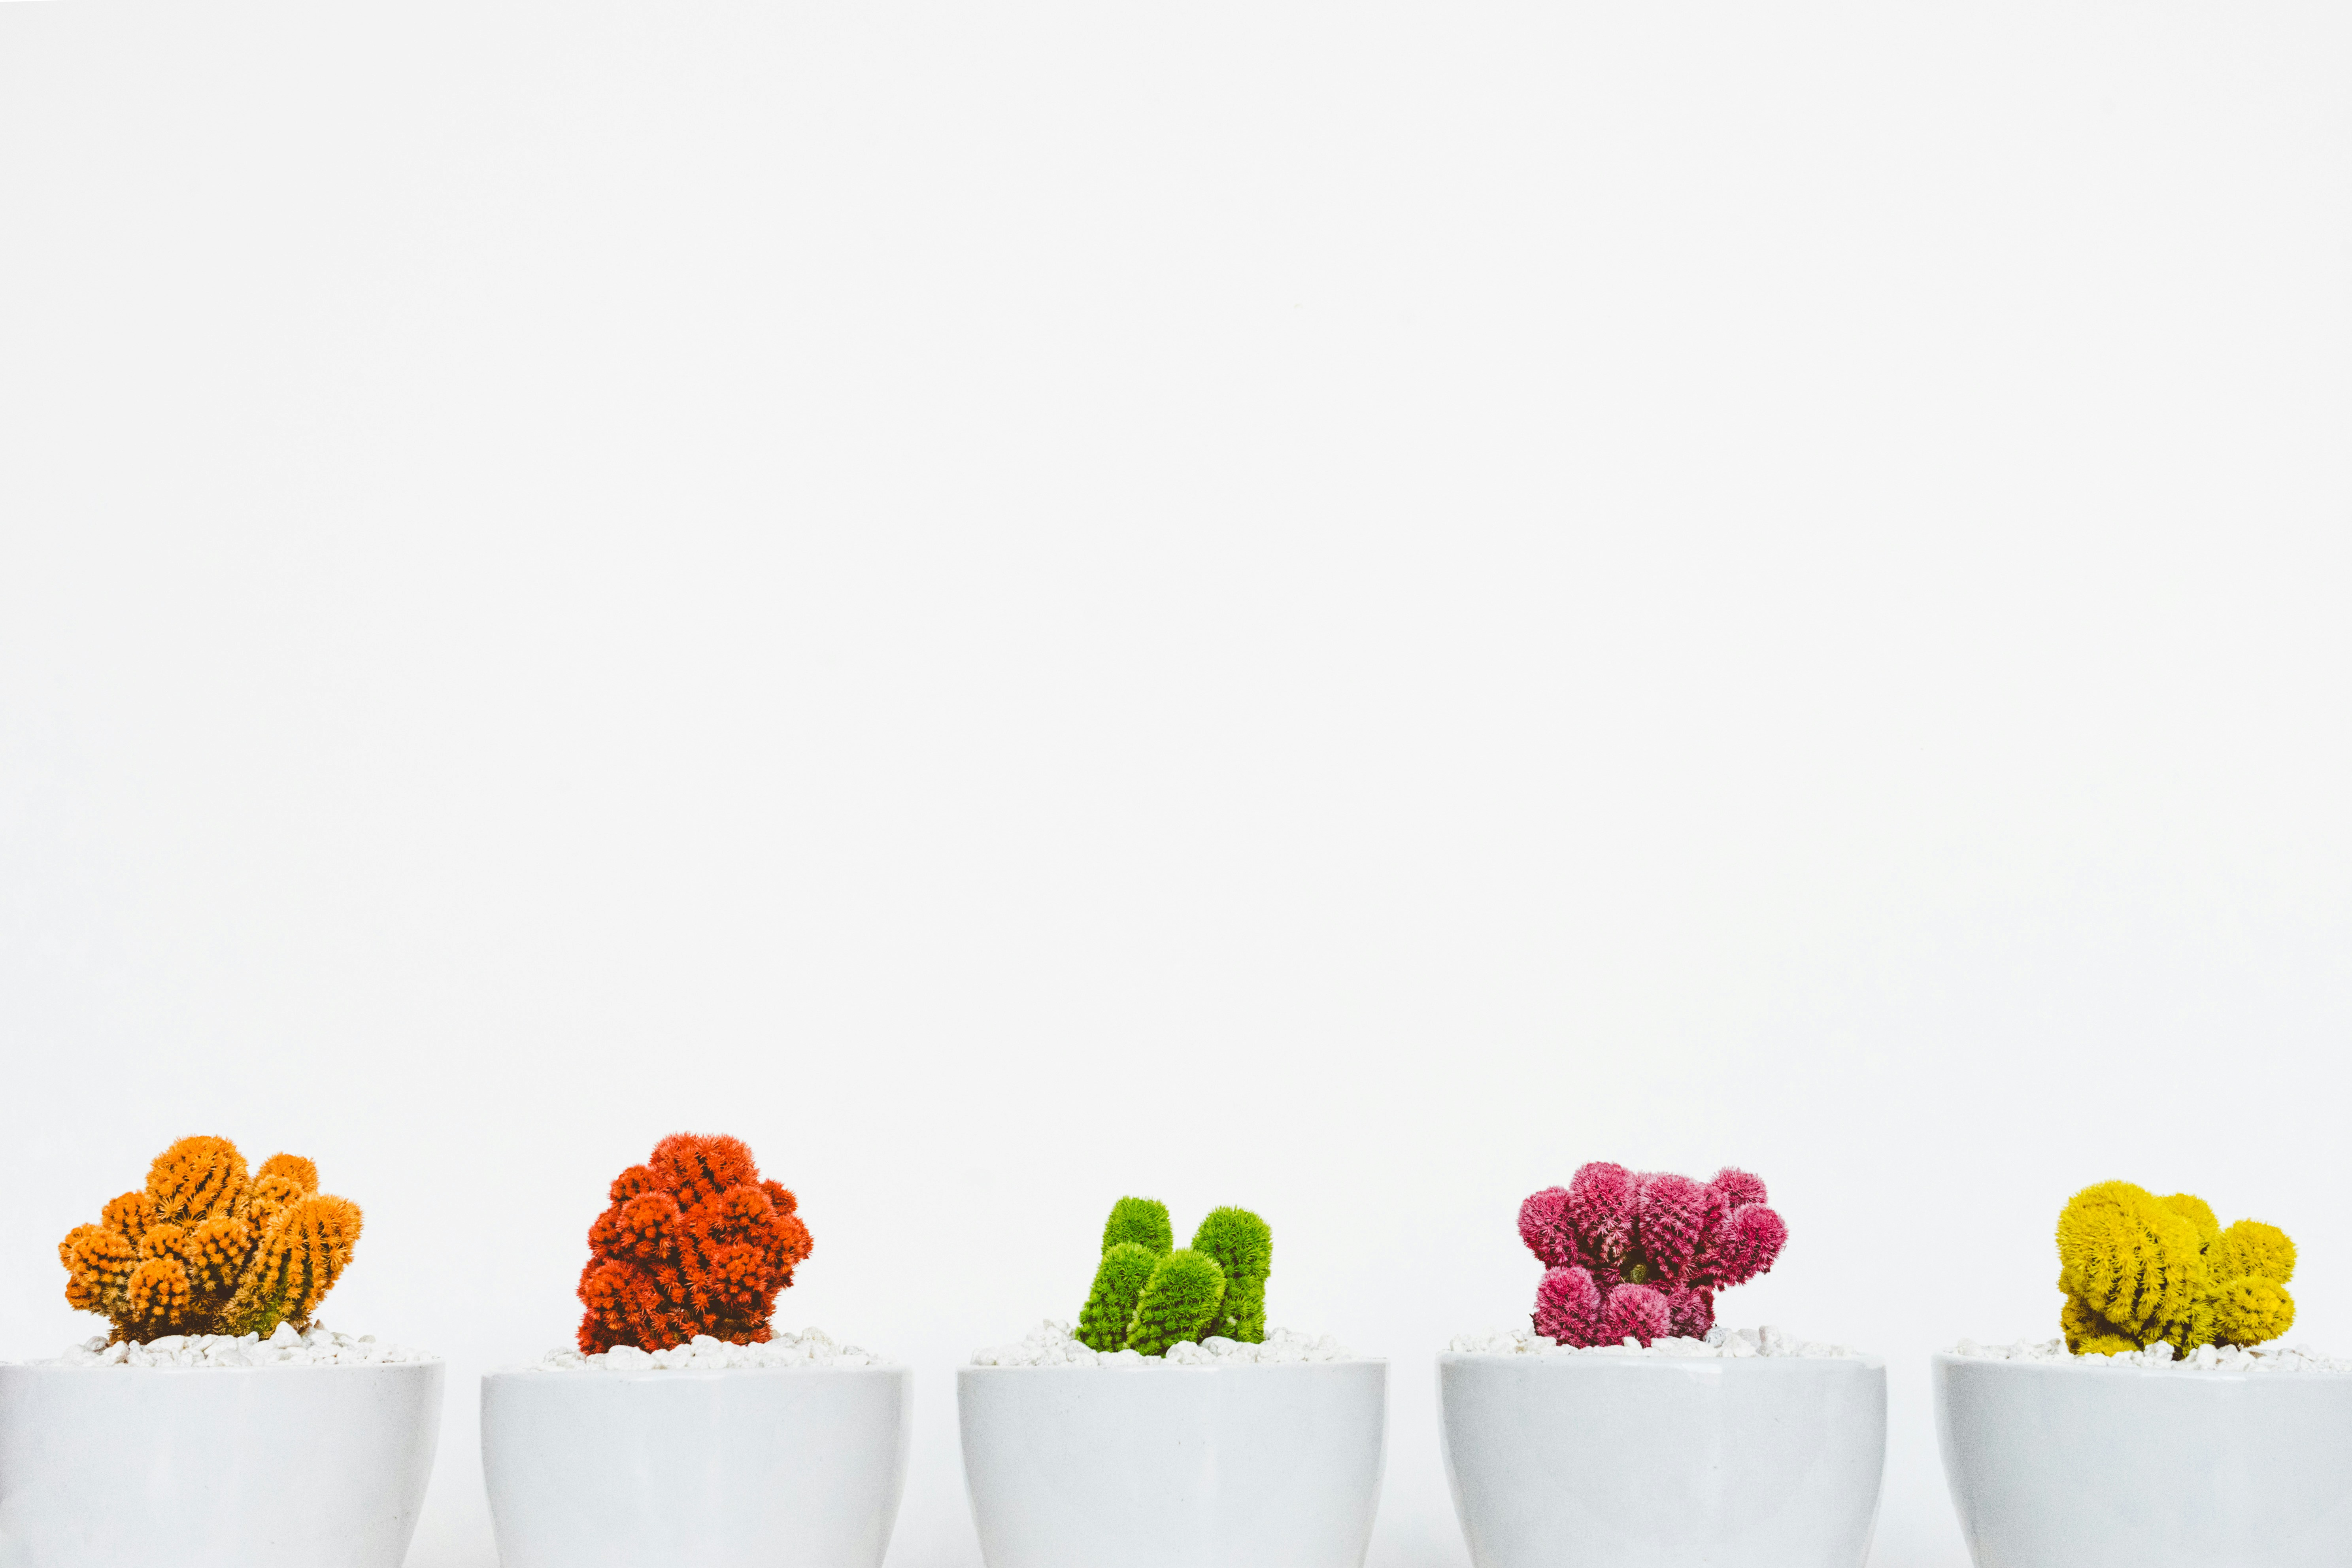

In [1]:
from IPython import display
display.Image("res/plants.jpg", width = 900, height = 600)

- Ejemplo esperado para la planta verde:

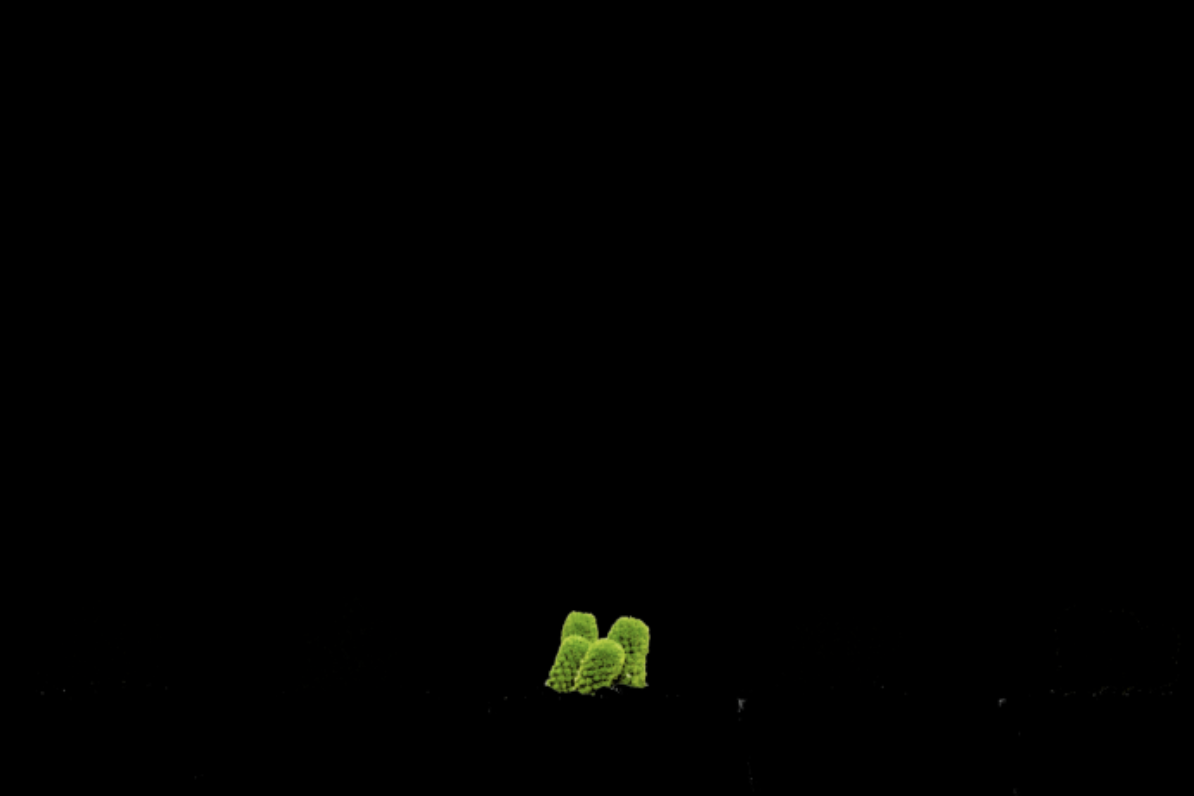

In [2]:
display.Image("img/verde_segmentada.png", width = 900, height = 600)

### Metodología

- Se puede utilizar como base el notebook visto en clase `HIG_3.3._Procesamiento_de_imágenes.ipynb`.
- No hay una solución única. Se puede realizar un análisis del método de segmentación que mejor funcione para esta imagen.
- Se recomienda hacer un pequeño análisis previo de la imagen.

### Entrega:
- Fichero .ipynb con el notebook, justificando adecuadamente cada paso seguido.
- Las entregas sólo serán validas si se realizan a través de la plataforma Studium.

### Fecha Entrega
- Convocatoria 1 - 26/01/2025, 00:00 AM CEST
- Convocatoria 2 - 30/01/2025, 00:00 AM CEST

In [ ]:
pip install opencv-python

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

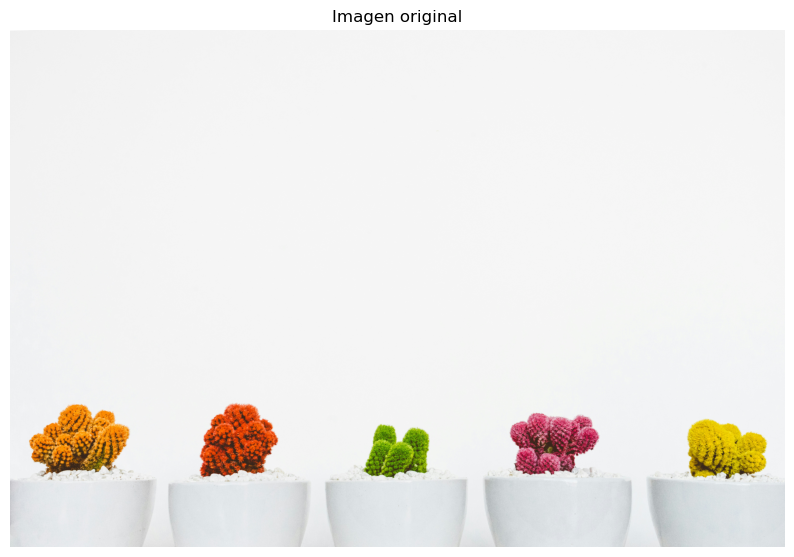

In [6]:
# Paso 1: Leer la imagen
figuras_path = os.path.join("res", "plants.jpg")
img = cv2.imread(figuras_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 20))
plt.imshow(img_rgb, cmap='gray')
plt.axis('off')
plt.title('Imagen original')
plt.show()

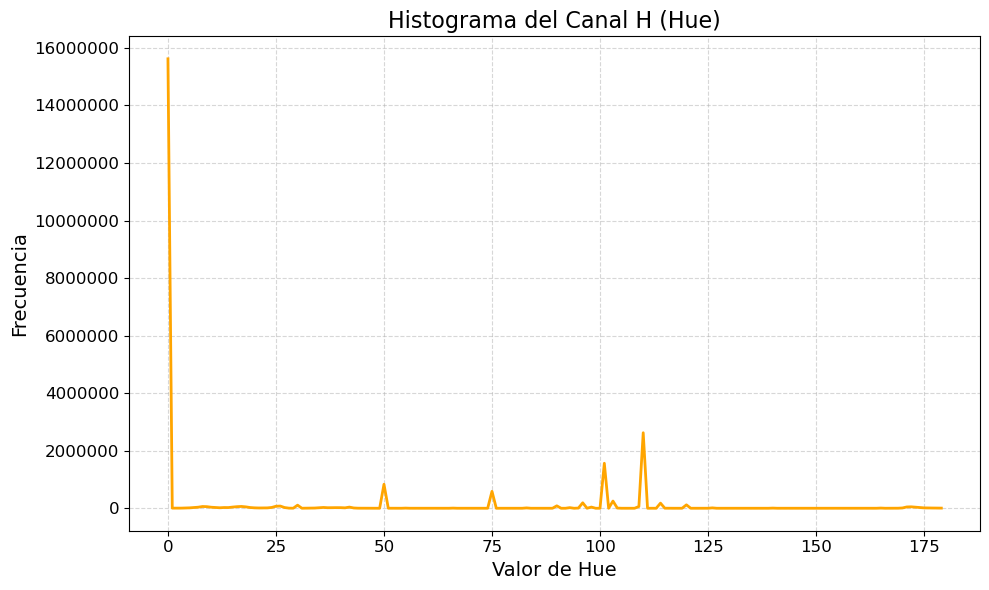

In [8]:
# Paso 2: Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv_image)

# Calcular el histograma del canal H
hist = cv2.calcHist([H], [0], None, [180], [0, 180])  # Valores del canal H van de 0 a 180

# Mostrar el histograma
plt.figure(figsize=(10, 6))
plt.plot(hist, color='orange', linewidth=2)
plt.grid(alpha=0.5, linestyle='--')
plt.title('Histograma del Canal H (Hue)', fontsize=16)
plt.xlabel('Valor de Hue', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Configurar el formato de los valores del eje Y
plt.ticklabel_format(style='plain', axis='y')  # Muestra los valores completos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [9]:

# Paso 3: Definir los rangos de color para los cactus que queremos segmentar
# Cactus naranja, limite inferior y superior en HSV
lower_orange = np.array([14, 150, 150])
upper_orange = np.array([20, 255, 255])

# Cactus verde
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Crear máscaras para cada color
mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Paso 4: Limpiar las máscaras usando operaciones morfológicas
kernel = np.ones((5, 5), np.uint8)
mask_orange_cleaned = cv2.morphologyEx(mask_orange, cv2.MORPH_CLOSE, kernel)
mask_green_cleaned = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)

# Seleccionar un solo cactus para cada color
mask_orange_single = mask_orange_cleaned
mask_green_single = mask_green_cleaned

# Aplicar las máscaras a la imagen original
result_orange_single = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_orange_single)
result_green_single = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_green_single)


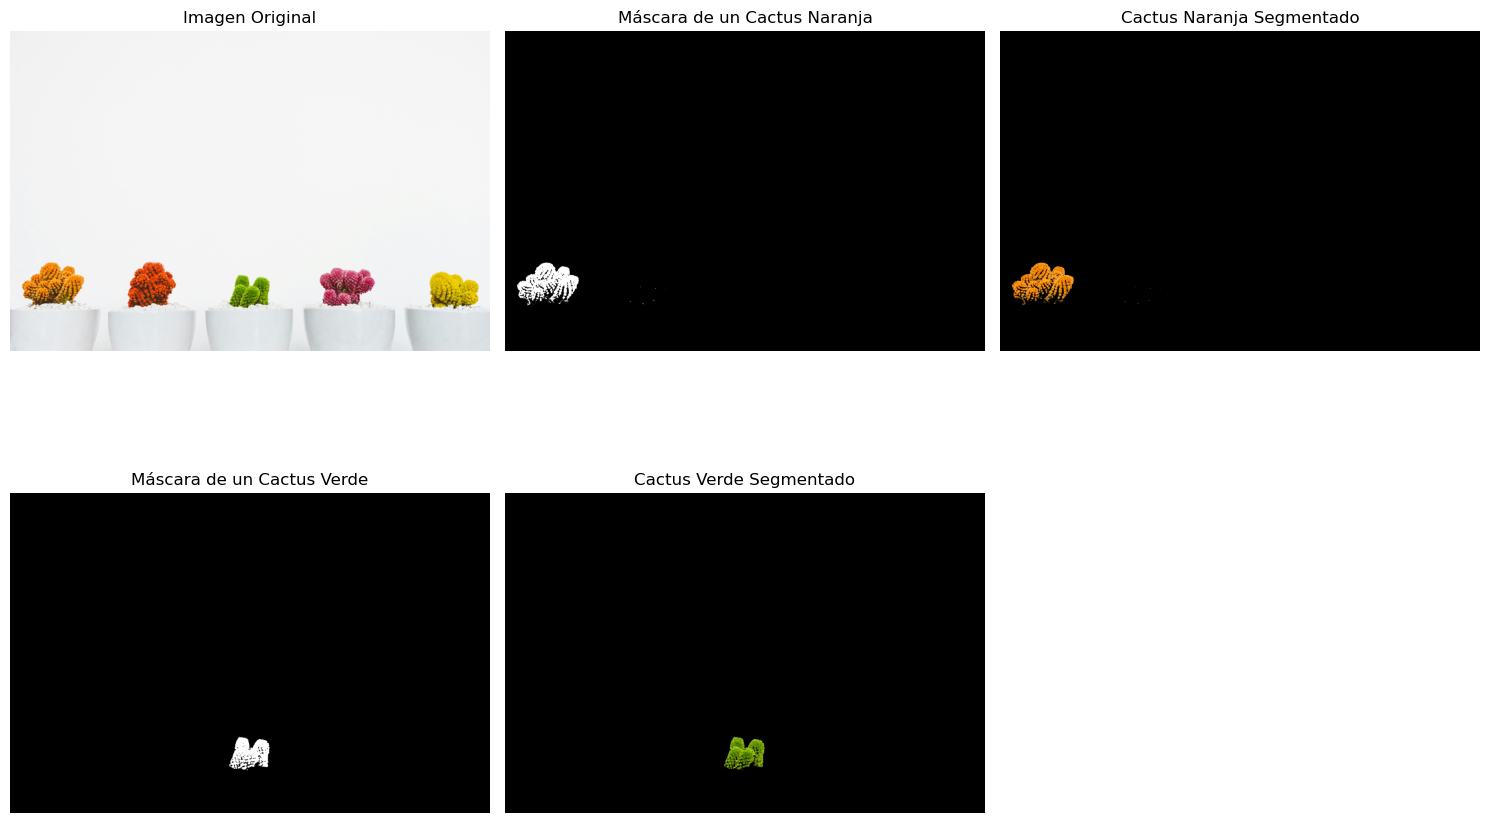

In [10]:
# Paso 5: Visualizar los resultados
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Imagen Original")
plt.axis("off")

# Máscara naranja (un cactus)
plt.subplot(2, 3, 2)
plt.imshow(mask_orange_single, cmap="gray")
plt.title("Máscara de un Cactus Naranja")
plt.axis("off")

# Segmentación naranja (un cactus)
plt.subplot(2, 3, 3)
plt.imshow(result_orange_single)
plt.title("Cactus Naranja Segmentado")
plt.axis("off")

# Máscara verde (un cactus)
plt.subplot(2, 3, 4)
plt.imshow(mask_green_single, cmap="gray")
plt.title("Máscara de un Cactus Verde")
plt.axis("off")

# Segmentación verde (un cactus)
plt.subplot(2, 3, 5)
plt.imshow(result_green_single)
plt.title("Cactus Verde Segmentado")
plt.axis("off")

plt.tight_layout()
plt.show()